('1', u'\u5317')
('1', u'\u4eac')
('1', u'\u9a6c')
('1', u'\u8fde')
('2', u'\u56fd')
('2', u'\u9645')
('2', u'\u8336')
('2', u'\u6587')
('2', u'\u5316')
('2', u'\u8282')
('3', u'\u5317')
('3', u'\u4eac')
('3', u'\u9a6c')
('3', u'\u8fde')
('4', u'\u56fd')
('4', u'\u9645')
('4', u'\u8336')
('4', u'\u6587')
('4', u'\u5316')
('4', u'\u8282')
('5', u'\u7d20')
('5', u'\u571f')
('6', u'\u7279')
('6', u'\u4ea7')
('7', u'\u4e2d')
('7', u'\u94c1')
('7', u'\u54a8')
('7', u'\u8be2')
('7', u'\u5927')
('7', u'\u53a6')
('8', u'\u7231')
('8', u'\u534e')
('8', u'\u56fd')
('8', u'\u9645')
('8', u'\u96c6')
('8', u'\u56e2')
('9', u'\u805a')
('9', u'\u516b')
('9', u'\u6765')
('9', u'\u5ba2')
('9', u'\u54c1')
('9', u'\u4e2d')
('9', u'\u56fd')
('9', u'\u540d')
('9', u'\u8336')


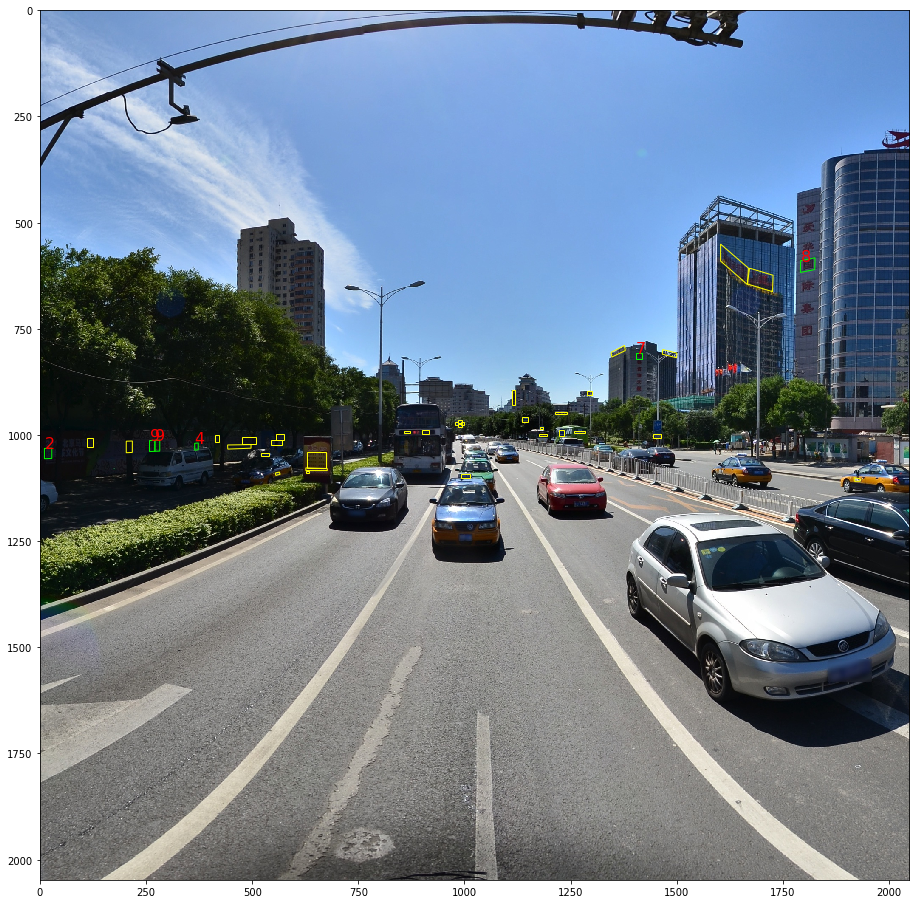

0001573.jpg


In [26]:
import cv2
import json
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os
import settings
import shutil
import re

from pythonapi import anno_tools

%matplotlib inline

with open('/home/wudao/ctw/ctw-annotations/train.jsonl') as f:
    lines = f.read().splitlines()
with open('/home/wudao/ctw/ctw-annotations/val.jsonl') as f:
    lines += f.read().splitlines()
#with open('/home/wudao/ctw/ctw-annotations/train.jsonl') as f:
#    anno = json.loads(f.readline())
for line in lines:
    anno = json.loads(line.strip())
    if(anno['file_name'] != "0001573.jpg"):
        continue
        
    path = os.path.join(settings.TRAINVAL_IMAGE_DIR, anno['file_name'])
    shutil.copy(path,"./")
    assert os.path.exists(path), 'file ot exists: {}'.format(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(16, 16))
    ax = plt.gca()
    plt.imshow(img)
    count = 0
    for block in anno['annotations']:
        count += 1
        for char in block:
            text = char['text']
            color = (0, 1, 0) if char['is_chinese'] else (1, 0, 0)
            if(re.match(u'^\u4e2d', text) or re.match(u'^\u56fd', text)):
                ax.add_patch(patches.Polygon(char['polygon'], fill=False, color=color))
                plt.text(char['polygon'][0][0], char['polygon'][0][1], count,
                 fontdict={'size': 16, 'color': 'r'})
            print(str(count),char['text'])

    for ignore in anno['ignore']:
        color = (1, 1, 0)
        ax.add_patch(patches.Polygon(ignore['polygon'], fill=False, color=color))
    plt.show()
    print(anno['file_name'])